# ESM Demo

In [2]:
import torch
import esm

In [3]:
# Load ESM-1b model
model, alphabet = esm.pretrained.esm1b_t33_650M_UR50S()
batch_converter = alphabet.get_batch_converter()
model.eval()  # disables dropout for deterministic results

# Prepare data (first 2 sequences from ESMStructuralSplitDataset superfamily / 4)
data = [
    ("protein1",
     "MKTVRQERLKSIVRILERSKEPVSGAQLAEELSVSRQVIVQDIAYLRSLGYNIVATPRGYVLAGG"),
    ("protein2",
     "KALTARQQEVFDLIRDHISQTGMPPTRAEIAQRLGFRSPNAAEEHLKALARKGVIEIVSGASRGIRLLQEE"
     ),
    ("protein2 with mask",
     "KALTARQQEVFDLIRD<mask>ISQTGMPPTRAEIAQRLGFRSPNAAEEHLKALARKGVIEIVSGASRGIRLLQEE"
     ),
    ("protein3", "K A <mask> I S Q"),
    ("protein4", "MESLVPGFNEKTHVQLSLPVLQVRDVLVRGFGDSVEEVLSEARQHLKDGTCGLVEVEKGVLPQLEQPYVFIKRSDARTAPHGHVMVELVAELEGIQYGRSGETLGVLVPHVGEIPVAYRKVLLRKNGNKGAGGHSYGADLKSFDLGDELGTDPYEDFQENWNTKHSSGVTRELMRELNGGAYTRYVDNNFCGPDGYPLECIKDLLARAGKASCTLSEQLDFIDTKRGVYCCREHEHEIAWYTERSEKSYELQTPFEIKLAKKFDTFNGECPNFVFPLNSIIKTIQPRVEKKKLDGFMGRIRSVYPVASPNECNQMCLSTLMKCDHCGETSWQTGDFVKATCEFCGTENLTKEGATTCGYLPQNAVVKIYCPACHNSEVGPEHSLAEYHNESGLKTILRKGGRTIAFGGCVFSYVGCHNKCAYWVPRASANIGCNHTGVVGEGSEGLNDNLLEILQKEKVNINIVGDFKLNEEIAIILASFSASTSAFVETVKGLDYKAFKQIVESCGNFKVTKGKAKKGAWNIGEQKSILSPLYAFASEAARVVRSIFSRTLETAQNSVRVLQKAAITILDGISQYSLRLIDAMMFTSDLATNNLVVMAYITGGVVQLTSQWLTNIFGTVYEKLKPVLDWLEEKFKEGVEFLRDGWEIVKFISTCACEIVGGQIVTCAKEIKESVQTFFKLVNKFLALCADSIIIGGAKLKALNLGETFVTHSKGLYRKCVKSREETGLLMPLKAPKEIIFLEGETLPTEVLTEEVVLKTGDLQPLEQPTSEAVEAPLVGTPVCINGLMLLEIKDTEKYCALAPNMMVTNNTFTLKGGAPTKVTFGDDTVIEVQGYKSVNITFELDERIDKVLNEKCSAYTVELGTEVNEFACVVADAVIKTLQPVSELLTPLGIDLDEWSMATYYLFDESGEFKLASHMYCSFYPPDEDEEEGDCEEEEFEPSTQYEYGTEDDYQGKPLEFGATSAALQPEEEQEEDWLDDDSQQTVGQQDGSEDNQTTTIQTIVEVQPQLEMELTPVVQTIEVNSFSGYLKLTDNVYIKNADIVEEAKKVKPTVVVNAANVYLKHGGGVAGALNKATNNAMQVESDDYIATNGPLKVGGSCVLSGHNLAKHCLHVVGPNVNKGEDIQLLKSAYENFNQHEVLLAPLLSAGIFGADPIHSLRVCVDTVRTNVYLAVFDKNLYDKLVSSFLEMKSEKQVEQKIAEIPKEEVKPFITESKPSVEQRKQDDKKIKACVEEVTTTLEETKFLTENLLLYIDINGNLHPDSATLVSDIDITFLKKDAPYIVGDVVQEGVLTAVVIPTKKAGGTTEMLAKALRKVPTDNYITTYPGQGLNGYTVEEAKTVLKKCKSAFYILPSIISNEKQEILGTVSWNLREMLAHAEETRKLMPVCVETKAIVSTIQRKYKGIKIQEGVVDYGARFYFYTSKTTVASLINTLNDLNETLVTMPLGYVTHGLNLEEAARYMRSLKVPATVSVSSPDAVTAYNGYLTSSSKTPEEHFIETISLAGSYKDWSYSGQSTQLGIEFLKRGDKSVYYTSNPTTFHLDGEVITFDNLKTLLSLREVRTIKVFTTVDNINLHTQVVDMSMTYGQQFGPTYLDGADVTKIKPHNSHEGKTFYVLPNDDTLRVEAFEYYHTTDPSFLGRYMSALNHTKKWKYPQVNGLTSIKWADNNCYLATALLTLQQIELKFNPPALQDAYYRARAGEAANFCALILAYCNKTVGELGDVRETMSYLFQHANLDSCKRVLNVVCKTCGQQQTTLKGVEAVMYMGTLSYEQFKKGVQIPCTCGKQATKYLVQQESPFVMMSAPPAQYELKHGTFTCASEYTGNYQCGHYKHITSKETLYCIDGALLTKSSEYKGPITDVFYKENSYTTTIKPVTYKLDGVVCTEIDPKLDNYYKKDNSYFTEQPIDLVPNQPYPNASFDNFKFVCDNIKFADDLNQLTGYKKPASRELKVTFFPDLNGDVVAIDYKHYTPSFKKGAKLLHKPIVWHVNNATNKATYKPNTWCIRCLWSTKPVETSNSFDVLKSEDAQGMDNLACEDLKPVSEEVVENPTIQKDVLECNVKTTEVVGDIILKPANNSLKITEEVGHTDLMAAYVDNSSLTIKKPNELSRVLGLKTLATHGLAAVNSVPWDTIANYAKPFLNKVVSTTTNIVTRCLNRVCTNYMPYFFTLLLQLCTFTRSTNSRIKASMPTTIAKNTVKSVGKFCLEASFNYLKSPNFSKLINIIIWFLLLSVCLGSLIYSTAALGVLMSNLGMPSYCTGYREGYLNSTNVTIATYCTGSIPCSVCLSGLDSLDTYPSLETIQITISSFKWDLTAFGLVAEWFLAYILFTRFFYVLGLAAIMQLFFSYFAVHFISNSWLMWLIINLVQMAPISAMVRMYIFFASFYYVWKSYVHVVDGCNSSTCMMCYKRNRATRVECTTIVNGVRRSFYVYANGGKGFCKLHNWNCVNCDTFCAGSTFISDEVARDLSLQFKRPINPTDQSSYIVDSVTVKNGSIHLYFDKAGQKTYERHSLSHFVNLDNLRANNTKGSLPINVIVFDGKSKCEESSAKSASVYYSQLMCQPILLLDQALVSDVGDSAEVAVKMFDAYVNTFSSTFNVPMEKLKTLVATAEAELAKNVSLDNVLSTFISAARQGFVDSDVETKDVVECLKLSHQSDIEVTGDSCNNYMLTYNKVENMTPRDLGACIDCSARHINAQVAKSHNIALIWNVKDFMSLSEQLRKQIRSAAKKNNLPFKLTCATTRQVVNVVTTKIALKGGKIVNNWLKQLIKVTLVFLFVAAIFYLITPVHVMSKHTDFSSEIIGYKAIDGGVTRDIASTDTCFANKHADFDTWFSQRGGSYTNDKACPLIAAVITREVGFVVPGLPGTILRTTNGDFLHFLPRVFSAVGNICYTPSKLIEYTDFATSACVLAAECTIFKDASGKPVPYCYDTNVLEGSVAYESLRPDTRYVLMDGSIIQFPNTYLEGSVRVVTTFDSEYCRHGTCERSEAGVCVSTSGRWVLNNDYYRSLPGVFCGVDAVNLLTNMFTPLIQPIGALDISASIVAGGIVAIVVTCLAYYFMRFRRAFGEYSHVVAFNTLLFLMSFTVLCLTPVYSFLPGVYSVIYLYLTFYLTNDVSFLAHIQWMVMFTPLVPFWITIAYIICISTKHFYWFFSNYLKRRVVFNGVSFSTFEEAALCTFLLNKEMYLKLRSDVLLPLTQYNRYLALYNKYKYFSGAMDTTSYREAACCHLAKALNDFSNSGSDVLYQPPQTSITSAVLQSGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICTSEDMLNPNYEDLLIRKSNHNFLVQAGNVQLRVIGHSMQNCVLKLKVDTANPKTPKYKFVRIQPGQTFSVLACYNGSPSGVYQCAMRPNFTIKGSFLNGSCGSVGFNIDYDCVSFCYMHHMELPTGVHAGTDLEGNFYGPFVDRQTAQAAGTDTTITVNVLAWLYAAVINGDRWFLNRFTTTLNDFNLVAMKYNYEPLTQDHVDILGPLSAQTGIAVLDMCASLKELLQNGMNGRTILGSALLEDEFTPFDVVRQCSGVTFQSAVKRTIKGTHHWLLLTILTSLLVLVQSTQWSLFFFLYENAFLPFAMGIIAMSAFAMMFVKHKHAFLCLFLLPSLATVAYFNMVYMPASWVMRIMTWLDMVDTSLSGFKLKDCVMYASAVVLLILMTARTVYDDGARRVWTLMNVLTLVYKVYYGNALDQAISMWALIISVTSNYSGVVTTVMFLARGIVFMCVEYCPIFFITGNTLQCIMLVYCFLGYFCTCYFGLFCLLNRYFRLTLGVYDYLVSTQEFRYMNSQGLLPPKNSIDAFKLNIKLLGVGGKPCIKVATVQSKMSDVKCTSVVLLSVLQQLRVESSSKLWAQCVQLHNDILLAKDTTEAFEKMVSLLSVLLSMQGAVDINKLCEEMLDNRATLQAIASEFSSLPSYAAFATAQEAYEQAVANGDSEVVLKKLKKSLNVAKSEFDRDAAMQRKLEKMADQAMTQMYKQARSEDKRAKVTSAMQTMLFTMLRKLDNDALNNIINNARDGCVPLNIIPLTTAAKLMVVIPDYNTYKNTCDGTTFTYASALWEIQQVVDADSKIVQLSEISMDNSPNLAWPLIVTALRANSAVKLQNNELSPVALRQMSCAAGTTQTACTDDNALAYYNTTKGGRFVLALLSDLQDLKWARFPKSDGTGTIYTELEPPCRFVTDTPKGPKVKYLYFIKGLNNLNRGMVLGSLAATVRLQAGNATEVPANSTVLSFCAFAVDAAKAYKDYLASGGQPITNCVKMLCTHTGTGQAITVTPEANMDQESFGGASCCLYCRCHIDHPNPKGFCDLKGKYVQIPTTCANDPVGFTLKNTVCTVCGMWKGYGCSCDQLREPMLQSADAQSFLNGFAV")
]

In [5]:
batch_labels, batch_strs, batch_tokens = batch_converter(data)

batch_tokens

tensor([[ 0, 20, 15, 11,  7, 10, 16,  9, 10,  4, 15,  8, 12,  7, 10, 12,  4,  9,
         10,  8, 15,  9, 14,  7,  8,  6,  5, 16,  4,  5,  9,  9,  4,  8,  7,  8,
         10, 16,  7, 12,  7, 16, 13, 12,  5, 19,  4, 10,  8,  4,  6, 19, 17, 12,
          7,  5, 11, 14, 10,  6, 19,  7,  4,  5,  6,  6,  2,  1,  1,  1,  1,  1,
          1],
        [ 0, 15,  5,  4, 11,  5, 10, 16, 16,  9,  7, 18, 13,  4, 12, 10, 13, 21,
         12,  8, 16, 11,  6, 20, 14, 14, 11, 10,  5,  9, 12,  5, 16, 10,  4,  6,
         18, 10,  8, 14, 17,  5,  5,  9,  9, 21,  4, 15,  5,  4,  5, 10, 15,  6,
          7, 12,  9, 12,  7,  8,  6,  5,  8, 10,  6, 12, 10,  4,  4, 16,  9,  9,
          2],
        [ 0, 15,  5,  4, 11,  5, 10, 16, 16,  9,  7, 18, 13,  4, 12, 10, 13, 32,
         12,  8, 16, 11,  6, 20, 14, 14, 11, 10,  5,  9, 12,  5, 16, 10,  4,  6,
         18, 10,  8, 14, 17,  5,  5,  9,  9, 21,  4, 15,  5,  4,  5, 10, 15,  6,
          7, 12,  9, 12,  7,  8,  6,  5,  8, 10,  6, 12, 10,  4,  4, 16,  9,  9,


In [6]:
# Extract per-residue representations (on CPU)
with torch.no_grad():
    results = model(batch_tokens, repr_layers=[33], return_contacts=True)

In [9]:
print(results.keys())

dict_keys(['logits', 'representations', 'attentions', 'contacts'])


In [12]:
token_representations = results["representations"][33]

# batch_size * seq_length * embedding_dim
print(token_representations.shape)

torch.Size([4, 73, 1280])


In [15]:
# Generate per-sequence representations via averaging
# NOTE: token 0 is always a beginning-of-sequence token, so the first residue is token 1.
sequence_representations = []
for i, (_, seq) in enumerate(data):
    sequence_representations.append(token_representations[i, 1:len(seq) +
                                                          1].mean(0))
sequence_representations
print(sequence_representations[0].shape)

torch.Size([1280])


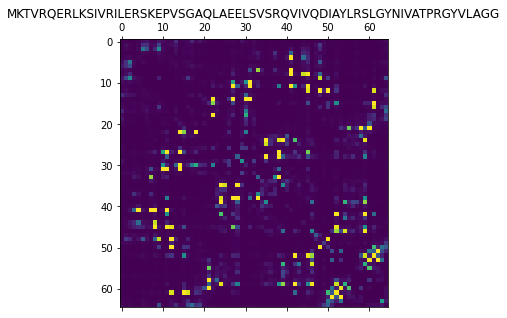

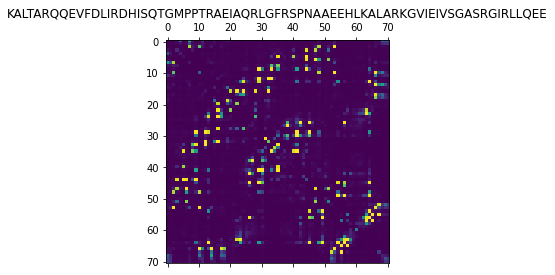

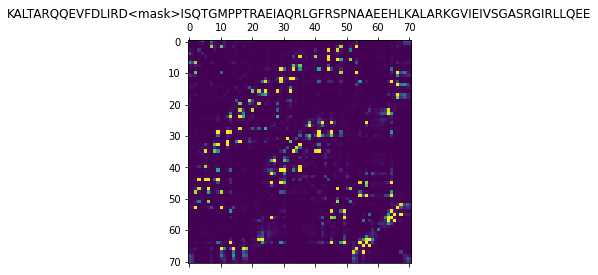

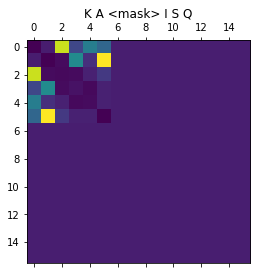

In [16]:
# Look at the unsupervised self-attention map contact predictions
import matplotlib.pyplot as plt
for (_, seq), attention_contacts in zip(data, results["contacts"]):
    plt.matshow(attention_contacts[:len(seq), :len(seq)])
    plt.title(seq)
    plt.show()

In [24]:
token_representations
token_representations.mean(1)

tensor([[ 0.1412,  0.0292,  0.0093,  ..., -0.0664, -0.0760, -0.0466],
        [ 0.1607,  0.1133, -0.0018,  ..., -0.0823, -0.0096, -0.0059],
        [ 0.1635,  0.1040,  0.0047,  ..., -0.0826, -0.0003, -0.0090],
        [-0.0201, -0.1059,  0.0308,  ...,  0.0823,  0.1491,  0.0521]])

In [22]:
embeddings = [emb for emb in token_representations]

In [23]:
embeddings

[tensor([[-0.0740,  0.0822,  0.2193,  ..., -0.0044,  0.0492, -0.1227],
         [ 0.0798,  0.0540,  0.1084,  ..., -0.0505, -0.3083, -0.0727],
         [ 0.2959, -0.4730, -0.0036,  ..., -0.0741, -0.0356,  0.2300],
         ...,
         [-0.1345, -0.2281,  0.0246,  ..., -0.2334, -0.1367, -0.2165],
         [-0.1345, -0.2281,  0.0246,  ..., -0.2334, -0.1367, -0.2165],
         [-0.1345, -0.2281,  0.0246,  ..., -0.2334, -0.1367, -0.2165]]),
 tensor([[-0.0447,  0.2140,  0.1737,  ...,  0.0023,  0.1281, -0.0192],
         [ 0.0304,  0.1029,  0.1069,  ..., -0.0171, -0.2542, -0.0119],
         [ 0.1783,  0.1450, -0.0456,  ..., -0.0765, -0.2040,  0.1652],
         ...,
         [-0.1878,  0.2319,  0.1394,  ..., -0.3136, -0.1030,  0.0074],
         [-0.1013, -0.0250,  0.1349,  ..., -0.1253,  0.0560,  0.0320],
         [-0.1091, -0.0871,  0.0701,  ..., -0.0362,  0.2081,  0.0200]]),
 tensor([[-0.0431,  0.2107,  0.1772,  ...,  0.0018,  0.1346, -0.0247],
         [ 0.0229,  0.1009,  0.1017,  ..., -0

In [25]:
lengths = torch.tensor([3,4,5,6])
filtered_embeddings = [
    emb[1:(length + 1), :]
    for emb, length in zip(embeddings, lengths)
]
filtered_embeddings

[tensor([[ 0.0798,  0.0540,  0.1084,  ..., -0.0505, -0.3083, -0.0727],
         [ 0.2959, -0.4730, -0.0036,  ..., -0.0741, -0.0356,  0.2300],
         [ 0.4061,  0.1483,  0.1694,  ..., -0.0198, -0.1599, -0.2346]]),
 tensor([[ 0.0304,  0.1029,  0.1069,  ..., -0.0171, -0.2542, -0.0119],
         [ 0.1783,  0.1450, -0.0456,  ..., -0.0765, -0.2040,  0.1652],
         [ 0.4702, -0.1670,  0.0034,  ..., -0.0758,  0.1202,  0.1645],
         [ 0.2439,  0.3574,  0.0725,  ...,  0.1642,  0.0400, -0.2980]]),
 tensor([[ 0.0229,  0.1009,  0.1017,  ..., -0.0300, -0.2423, -0.0285],
         [ 0.1746,  0.1393, -0.0335,  ..., -0.0768, -0.1870,  0.1636],
         [ 0.4794, -0.1681,  0.0220,  ..., -0.0733,  0.1283,  0.1459],
         [ 0.2475,  0.3474,  0.0704,  ...,  0.1565,  0.0339, -0.3083],
         [ 0.2944,  0.3235,  0.0126,  ..., -0.1815, -0.3322, -0.2364]]),
 tensor([[-0.0125, -0.0144,  0.1064,  ..., -0.2588,  0.1547, -0.3045],
         [-0.0335, -0.0504, -0.1111,  ..., -0.0560,  0.0367,  0.0252],
